# **Atividade - Perceptron e MLP com scripts programados com PyTorch**


*   **Nome**: Cristiano Tolentino Santos
*   **Matrícula**: 211028050

---

# **Diagnóstico de Diabetes com Redes Neurais**

Nesta atividade, vamos trabalhar com um problema aplicado de **classificação binária**: prever se uma pessoa possui ou não diabetes com base em um conjunto de variáveis clínicas.

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

## **Contexto**

- O dataset utilizado é o **Pima Indians Diabetes Dataset**, coletado originalmente pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos.
- Ele contém registros de mulheres com pelo menos 21 anos de idade da população Pima, um grupo étnico nativo norte-americano com alta incidência de diabetes tipo 2.

## **Objetivo**

O objetivo é treinar uma MLP para prever a presença de diabetes a partir de atributos fisiológicos e laboratoriais.

## **Variáveis de entrada**

Cada observação contém os seguintes atributos:

1. **Pregnancies**, number of times pregnant: Variável discreta.
2. **Glucose**, plasma glucose concentration after 2 hours in an oral glucose tolerance test: Variável contínua.
3. **BloodPressure**, diastolic blood pressure, in mm Hg: Variável contínua.
4. **SkinThickness**, triceps skin fold thickness, in mm: Variável contínua.
5. **Insulin**, 2-hour serum insulin, in μU/mL: Variável contínua.
6. **BMI**, body mass index, weight in kg/(height in m)²: Variável contínua.
7. **DiabetesPedigreeFunction**, family history function: Variável contínua.
8. **Age**, in years: : Variável discreta.

## **Variáveis de saída (Target)**

- **Outcome = 1**: Diabetic
- **Outcome = 0**: Non-diabetic


# **Exercício 1 - Preparação dos dados**

1. Realize tratamento e limpeza de dados caso necessário para treinamento do modelo
2. Crie a matriz de correlação das features e extraia pelo menos um insight estatítstico visível na matriz




In [79]:
import pandas as pd

# URL do dataset
url = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/diabetes.csv"

# Carregar o dataset
df = pd.read_csv(url)

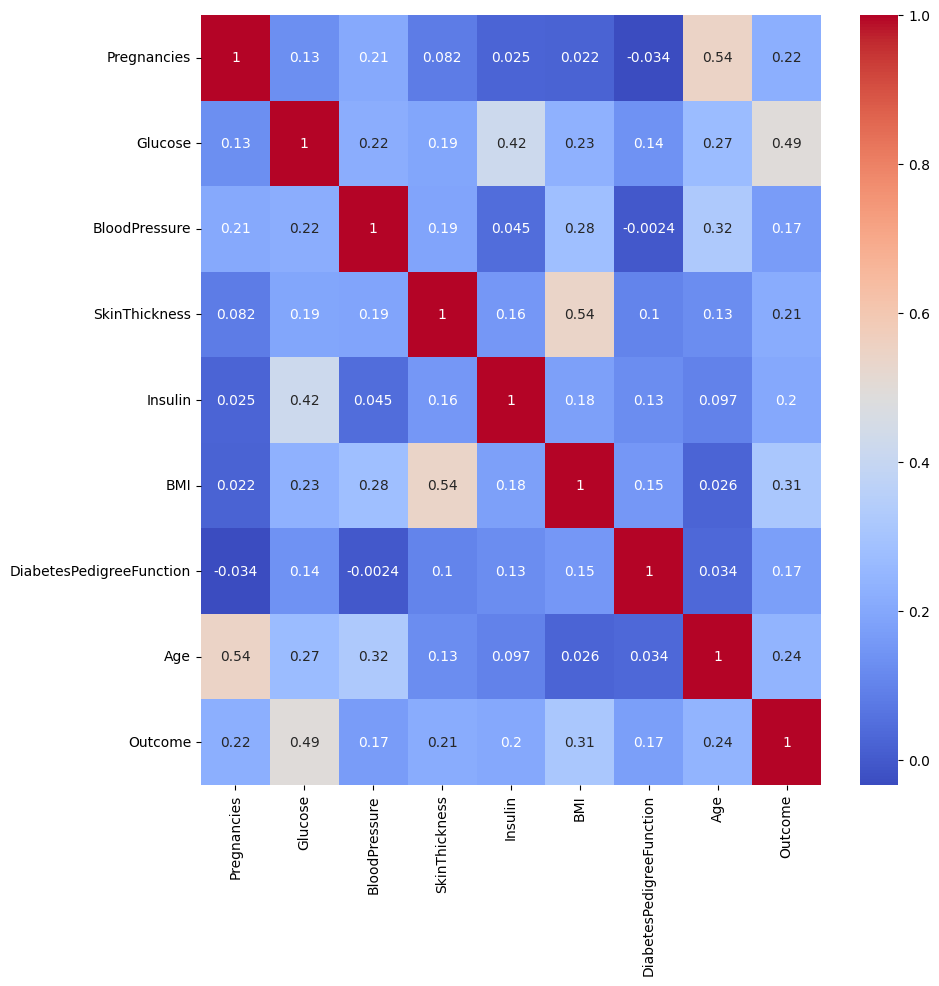

In [80]:
##### Código Exercício 1 ######

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col] = df[col].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

features = df.drop("Outcome", axis=1)
outcome = df["Outcome"]
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


#### Respostas Exercício 1:

insight estatístico sobre os dados a partir da matriz de correlação

## **Exercício 2 — Comparação de Modelos de Classificação**

### Objetivo
Treinar e comparar dois modelos de classificação supervisionada usando **scikit-learn**:
- **DecisionTreeClassifier**
- **RandomForestClassifier**

O foco é **encontrar a melhor combinação de hiperparâmetros** para cada modelo e **analisar qual apresenta melhor desempenho** nos conjuntos de treino e teste.

---

###  Instruções

1. **Divisão dos dados**
   - Utilize o mesmo dataset do Exercício 1 (já limpo e tratado).  
   - Divida os dados em **80% para treino** e **20% para teste**, de forma **estratificada** para manter a proporção de classes.  
   - Use `train_test_split` do **scikit-learn** com `random_state=42`.

2. **Treinamento dos modelos**
   - Crie dois modelos e os treine utilizando o **conjunto de treino**:
     - `DecisionTreeClassifier`
     - `RandomForestClassifier`

3. **Busca de hiperparâmetros**
   - Utilize **GridSearchCV** para encontrar a melhor combinação de parâmetros para cada modelo.  
   - Varie os seguintes parâmetros:
     - **Decision Tree** → `max_depth`, `min_samples_split`, `min_samples_leaf`, `criterion`.  
     - **Random Forest** → `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`.

4. **Avaliação**
   - Avalie os **melhores modelos** (após o GridSearch) usando o **conjunto de teste**.  
   - Calcule as métricas:
     - **Acurácia**
     - **F1-Score**

5. **Apresentação dos resultados**
   - Monte uma **tabela Markdown** como a seguir:

     ```markdown
     | Modelo | Conjunto | Acurácia | F1-Score |
     |:-------|:----------|----------:|----------:|
     | Decision Tree | Treino | 0.0000 | 0.0000 |
     | Decision Tree | Teste  | 0.0000 | 0.0000 |
     | Random Forest | Treino | 0.0000 | 0.0000 |
     | Random Forest | Teste  | 0.0000 | 0.0000 |
     ```

6. **Análise dos resultados**
   - Responda:
     - a) Qual modelo obteve melhor desempenho? por quê ?.  
     - b) Houve **overfitting**? Como você justificaria a resposta anterior?
     - d) Qual modelo se sobressaiu ? Esse resultado era esperado ? Por quê?



In [81]:
##### Exercício 2 #####

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.20, stratify=outcome, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
dtc_params = {"max_depth": [3, 5, 7, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "criterion": ["gini", "entropy"]}
rfc_params = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "max_features": ["sqrt", "log2"]}
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, scoring="f1", n_jobs=-1)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring="f1", n_jobs=-1)
dtc_grid.fit(X_train, y_train)
rfc_grid.fit(X_train, y_train)
best_dtc = dtc_grid.best_estimator_
best_rfc = rfc_grid.best_estimator_

def evaluate(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    return {"acc_train": accuracy_score(y_train, pred_train), "f1_train": f1_score(y_train, pred_train), "acc_test": accuracy_score(y_test, pred_test), "f1_test": f1_score(y_test, pred_test)}

results_dtc = evaluate(best_dtc, X_train, X_test, y_train, y_test)
results_rfc = evaluate(best_rfc, X_train, X_test, y_train, y_test)

print("### Resultados")
print("| Modelo | Conjunto | Acurácia | F1-Score |")
print("|:-------|:---------|----------:|----------:|")
print(f"| Decision Tree | Treino | {results_dtc['acc_train']:.4f} | {results_dtc['f1_train']:.4f} |")
print(f"| Decision Tree | Teste  | {results_dtc['acc_test']:.4f} | {results_dtc['f1_test']:.4f} |")
print(f"| Random Forest | Treino | {results_rfc['acc_train']:.4f} | {results_rfc['f1_train']:.4f} |")
print(f"| Random Forest | Teste  | {results_rfc['acc_test']:.4f} | {results_rfc['f1_test']:.4f} |")

### Resultados
| Modelo | Conjunto | Acurácia | F1-Score |
|:-------|:---------|----------:|----------:|
| Decision Tree | Treino | 0.7915 | 0.6049 |
| Decision Tree | Teste  | 0.6818 | 0.3467 |
| Random Forest | Treino | 0.9674 | 0.9522 |
| Random Forest | Teste  | 0.7532 | 0.6275 |


Análise dos resultados:

- a) O Random Forest, pois apresentou maior F1, indicando melhor capacidade de generalização.
- b) Sim, principalmente no Random Forest. A diferença entre treino e teste foi grande, mostrando que o modelo aprendeu demais o treino e perdeu desempenho no teste.
- d) O Random Forest se sobressaiu como esperado, ensembles de várias árvores performam melhor que uma árvore única.

# **Exercício 3 - Construção MLP**

1. Proponha uma arquiterura de MLP, defina os hiperparâmetros, otimizador, função de perda.
2. Faça a divisão dos dados:
  - 70% para treino
  - 15% para validação
  - 15% para teste
3. Faça o treinamento da rede e apresente:
  - Acurácia no conjunto de teste.
  - Matriz de confusão.
  - Relatório de classificação.
4. Responda:
- a) Houve diferença entre o desempenho no conjunto de validação e no conjunto de teste? Como essa diferença deve ser interpretada?
- b) Como a validação contribui para construção de um modelo mais estável**
- c) Durante o treinamento do seu MLP, qual/quais foram as decisões que mais impactaram o desempenho final do modelo (como número de camadas, taxa de aprendizado, função de ativação ou otimizador)? Reflita sobre como essas escolhas influenciaram o comportamento do erro de treino e validação ao longo das épocas.

**O uso de pytorch é obrigatório para resolução**

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
# --- Acurácia
acc_test = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc_test:.4f}")

# --- Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()

# --- Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))


NameError: name 'y_true_test' is not defined

### Respostas Exercício 3

- a)

- b)

- c)


## QA

1. **Considere um modelo de detecção de fraudes em transações financeiras. Nesse contexto, qual métrica deve ser priorizada — *precision* ou *recall* — e por quê? Justifique com base nos efeitos de falsos positivos e falsos negativos.**  
2. **Considere um modelo de triagem médica que identifica pacientes em estado crítico. Nesse caso, qual métrica deve ser priorizada — *precision* ou *recall* — e por quê? Explique os impactos dessa escolha.**  
3. **Um modelo de classificação apresenta previsões sistematicamente enviesadas para uma das classes, independentemente dos dados de entrada. O que esse comportamento indica e quais medidas podem ser tomadas para corrigir o problema?**  
4. **Durante o treinamento de uma rede neural profunda, as camadas iniciais deixam de atualizar seus pesos, apresentando gradientes próximos de zero. Que fenômeno está ocorrendo, quais são suas causas e quais estratégias podem ser aplicadas para solucioná-lo?**  
5. **Um aluno utiliza a função de ativação degrau em todas as camadas de um MLP profundo. Descreva o impacto dessa decisão sobre o processo de aprendizado e compare com o comportamento de uma rede que utiliza a função ReLU.**




### Respostas QA

1) É melhor maximizar o recall, pois transações fraudulentas classificadas como legítimas são consideradamente maais dificeis de resolver e explicar a clientes.

2) É melhor maximizar o recall, pois pacientes em estado crítico classificados como não críticos podem resultar em mortes enquanto o oposto apenas gera lentidão burocrática.

3) O comportamento indica um problema de bias no modelo, deria necessário balancear os dados artificialmente, criando mais exemplos da classe minoritária ou excluindo exemplos da classe majoritária.

4) O comportamento indica um problema de vanishing gradient, que pode ser causado pelo fato que cada camada é multiplicada por valores normalmente menores que 1, logo, quanto mais profunda a rede, mais o produto final se torna próximo de 0.

5) O uso da função inviabiliza o aprendizado devido à natureza não-diferenciável da função, o gradiente é zero em quase todo o domínio e indefinido no ponto de transição, impossibilitando backpropagation. Porém ReLU é diferenciável manténdo gradiente constante igual a 1 na região positiva, permitindo fluxo eficiente durante backpropagation.
